<h1>Table of Contents<span class="tocSkip"></span></h1>
<div class="toc"><ul class="toc-item"><li><span><a href="#Знакомство-с-данными." data-toc-modified-id="Знакомство-с-данными.-1"><span class="toc-item-num">1&nbsp;&nbsp;</span>Знакомство с данными.</a></span></li><li><span><a href="#Разделение-данных-на-выборки." data-toc-modified-id="Разделение-данных-на-выборки.-2"><span class="toc-item-num">2&nbsp;&nbsp;</span>Разделение данных на выборки.</a></span></li><li><span><a href="#Исследование-качества-разных-типов-моделей-с-подбором-гиперпараметров." data-toc-modified-id="Исследование-качества-разных-типов-моделей-с-подбором-гиперпараметров.-3"><span class="toc-item-num">3&nbsp;&nbsp;</span>Исследование качества разных типов моделей с подбором гиперпараметров.</a></span></li><li><span><a href="#Проверка-выбранной-модели-на-тестовой-выборке." data-toc-modified-id="Проверка-выбранной-модели-на-тестовой-выборке.-4"><span class="toc-item-num">4&nbsp;&nbsp;</span>Проверка выбранной модели на тестовой выборке.</a></span></li><li><span><a href="#Проверка-модели-на-вменяемость." data-toc-modified-id="Проверка-модели-на-вменяемость.-5"><span class="toc-item-num">5&nbsp;&nbsp;</span>Проверка модели на вменяемость.</a></span></li><li><span><a href="#Общий-вывод-по-исследованию:" data-toc-modified-id="Общий-вывод-по-исследованию:-6"><span class="toc-item-num">6&nbsp;&nbsp;</span>Общий вывод по исследованию:</a></span></li></ul></div>

<div class="alert alert-info"><b>Описание проекта:</b>
   
# "Подбор нового тарифа для клиентов с архивными тарифами"

***

**Цели проекта:**
- рекомендовать пользователям архивных тарифов переход на новые тарифы: «Смарт» или «Ультра».
    
***
    
**Задачи исследования:**
- проанализировать поведение клиентов, которые уже перешли на новые тарифы;
- по результатам проведенного анализа данных построить модель (со значением accuracy не менее 0.75), которая поможет выбрать подходящий тариф для клиентов на архивном тарифе, для последующей рекомендации этого тарифа клиенту;
- проверка выбранной модели на вменяемость.
    
***
    
**Этапы исследования:**
- знакомство с данными;
- разделение данных на выборки;
- исследование качества разных типов моделей с подбором гиперпараметров;
- проверка выбранной модели на тестовой выборке;
- проверка модели на вменяемость.
    
***

<b>Описание данных</b>
<br>Каждый объект в наборе данных — это информация о поведении одного пользователя за месяц. 
<br>Известно:
* сalls — количество звонков,
* minutes — суммарная длительность звонков в минутах,
* messages — количество sms-сообщений,
* mb_used — израсходованный интернет-трафик в Мб,
* is_ultra — каким тарифом пользовался в течение месяца («Ультра» — 1, «Смарт» — 0).    
    
***  
    
В сооветствии с условиями построим модель для задачи классификации с учителем.
    
</div>

***

### Знакомство с данными.

In [1]:
import warnings

import pandas as pd

from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score, confusion_matrix, ConfusionMatrixDisplay
from sklearn.model_selection import train_test_split
from sklearn.dummy import DummyClassifier
import seaborn as sns

# Избавляемся от вывода предупреждений
warnings.simplefilter("ignore")

# Отображение всех колонок
pd.set_option('display.max_columns', None)

In [2]:
# Открываем файл с датасетом, выводим первые 5 строк.

try:
    data = pd.read_csv('C:/Датасеты и проекты/users_behavior.csv')
except:
    data = pd.read_csv('/datasets/users_behavior.csv')
    
data.head()

,calls,minutes,messages,mb_used,is_ultra
0,40.0,311.90,83.0,19915.42,0
1,85.0,516.75,56.0,22696.96,0
2,77.0,467.66,86.0,21060.45,0
3,106.0,745.53,81.0,8437.39,1
4,66.0,418.74,1.0,14502.75,0


In [3]:
# Получаем информацию о датасете.
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3214 entries, 0 to 3213
Data columns (total 5 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   calls     3214 non-null   float64
 1   minutes   3214 non-null   float64
 2   messages  3214 non-null   float64
 3   mb_used   3214 non-null   float64
 4   is_ultra  3214 non-null   int64  
dtypes: float64(4), int64(1)
memory usage: 125.7 KB


In [4]:
# Узнаем количество строк и столбцов в датафрейме.
data.shape

(3214, 5)

In [5]:
# Выводим количество пропущенных значений для каждого признака.
data.isna().sum()

calls       0
minutes     0
messages    0
mb_used     0
is_ultra    0
dtype: int64

 <div class="alert alert-info"><b>Наблюдения:</b>
   
Пропусков среди признаков не имеется.
</div>

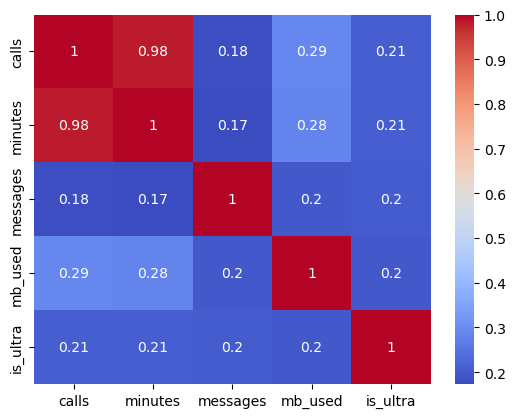

In [6]:
# Построим матрицу корреляции признаков.
sns.heatmap(data.corr(), annot=True, cmap='coolwarm');

 <div class="alert alert-info"><b>Наблюдения:</b>
   
Явных зависимостей между признаками (за исключением calls и minutes, что в принципе логично) не прослеживается.
</div>

In [7]:
# Посмотрим распределение численных значений признаков.
data.describe()

,calls,minutes,messages,mb_used,is_ultra
count,3214.000000,3214.000000,3214.000000,3214.000000,3214.000000
mean,63.038892,438.208787,38.281269,17207.673836,0.306472
std,33.236368,234.569872,36.148326,7570.968246,0.461100
min,0.000000,0.000000,0.000000,0.000000,0.000000
25%,40.000000,274.575000,9.000000,12491.902500,0.000000
50%,62.000000,430.600000,30.000000,16943.235000,0.000000
75%,82.000000,571.927500,57.000000,21424.700000,1.000000
max,244.000000,1632.060000,224.000000,49745.730000,1.000000


 <div class="alert alert-info"><b>Наблюдения:</b>
   
Прослеживается неравномерное распределение значений столбца 'is_ultra'.

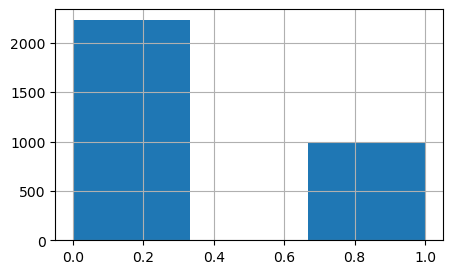

In [8]:
# Посмотрим распределение значений столбца 'is_ultra' на графике.
data['is_ultra'].hist(bins=3, range = (0, 1), figsize=(5, 3));

In [9]:
data['is_ultra'].value_counts(normalize=True)

0    0.693528
1    0.306472
Name: is_ultra, dtype: float64

 <div class="alert alert-info"><b>Наблюдения:</b>
   
Прослеживается несбалансированность классов в целевом признаке (столбец 'is_ultra').
</div>

***

### Разделение данных на выборки.

In [10]:
# Разделим исходные данные на обучающую, валидационную и тестовую выборки из расчета 60% - 20% - 20% соответственно.
data_train, data_valid = train_test_split(data, test_size=0.40, random_state=12345, stratify = data['is_ultra'])
data_valid, data_test = train_test_split(data_valid, test_size=0.50, random_state=12345)

 <div class="alert alert-info"><b>Комментарий:</b>
   
Выберем в качестве целевого признака столбец 'is_ultra'. Сформируем обучающий, валидационный и тестовый датасеты.
</div>

In [11]:
features_train = data_train.drop(['is_ultra'], axis=1)
target_train = data_train['is_ultra']

features_valid = data_valid.drop(['is_ultra'], axis=1)
target_valid = data_valid['is_ultra']

features_test = data_test.drop(['is_ultra'], axis=1)
target_test = data_test['is_ultra']

In [12]:
# Узнаем количество строк в обучающей выборке.
print(features_train.shape)
print(target_train.shape)

(1928, 4)
(1928,)


In [13]:
# Узнаем количество строк в валидационной выборке.
print(features_valid.shape)
print(target_valid.shape)

(643, 4)
(643,)


In [14]:
# Узнаем количество строк в тестовой выборке.
print(features_test.shape)
print(target_test.shape)

(643, 4)
(643,)


***

### Исследование качества разных типов моделей с подбором гиперпараметров.

In [15]:
%%time

# Исследуем качество модели "дерево решений".
best_model_tree = None
best_result_tree = 0
best_depth_tree = 0
best_max_leaf_nodes = 0

for depth in range(1, 11):
    for nodes in range(2, 50):    
        model_1 = DecisionTreeClassifier(random_state=12345, max_depth=depth, max_leaf_nodes=nodes)
        model_1.fit(features_train, target_train)
        predictions_valid = model_1.predict(features_valid) # < найдите предсказания на валидационной выборке >
        result = accuracy_score(target_valid, predictions_valid)
        if result > best_result_tree:
            best_model_tree = model_1
            best_result_tree = result #  сохраните наилучшее значение метрики accuracy на валидационных данных
            best_depth_tree = depth
            best_max_leaf_nodes = nodes

print('Accuracy наилучшей модели на валидационной выборке:', best_result_tree)
print('Максимальная глубина:', best_depth_tree)
print('максимальное количество листьев в дереве:', best_max_leaf_nodes)

Accuracy наилучшей модели на валидационной выборке: 0.8180404354587869
Максимальная глубина: 6
максимальное количество листьев в дереве: 11
Wall time: 2.96 s


 <div class="alert alert-info"><b>Комментарий:</b>
   
Получили максимальное значение Accuracy на валидационной выборке у модели "дерево решений" - 0.8180404354587869, удовлетворяющее условию задачи (не менее 0.75), при максимальной глубине дерева: 6 и с максимальным количеством листьев в дереве: 11.
</div>

In [16]:
%%time

# Исследуем качество модели "случайный лес".
best_model_forest = None
best_result_forest = 0
best_est_forest = 0
best_depth_forest = 0

for est in range(10, 51, 10):
    for depth in range (1, 11):
        model_2 = RandomForestClassifier(random_state=12345, n_estimators=est, max_depth=depth)  
        model_2.fit(features_train, target_train)
        result = model_2.score(features_valid, target_valid)
        if result > best_result_forest:
            best_model_forest = model_2
            best_result_forest = result
            best_est_forest = est
            best_depth_forest = depth

print("Accuracy наилучшей модели на валидационной выборке:", best_result_forest) 
print("Количество деревьев:", best_est_forest)
print("Максимальная глубина:", best_depth_forest)

Accuracy наилучшей модели на валидационной выборке: 0.8242612752721618
Количество деревьев: 30
Максимальная глубина: 8
Wall time: 4.33 s


 <div class="alert alert-info"><b>Комментарий:</b>
   
Получили максимальное значение Accuracy на валидационной выборке у модели "случайный лес" - 0.8242612752721618, удовлетворяющее условию задачи (не менее 0.75), с количеством деревьев: 30 и при максимальной глубине дерева: 8.
</div>

In [17]:
%%time

# Исследуем качество модели "логистическая регрессия".
best_model_logistic = None
best_result_logistic = 0
best_solver_logistic = ''

solvers = ['newton-cg', 'lbfgs', 'liblinear', 'sag', 'saga']

for solver in solvers:
    model_3 = LogisticRegression(random_state=12345, solver=solver).fit(features_train, target_train)    
    result = model_3.score(features_valid, target_valid)
    if result > best_result_logistic:
        best_model_logistic = model_3
        best_result_logistic = result
        best_solver_logistic = solver
        
print("Accuracy наилучшей модели на валидационной выборке:", best_result_logistic) 
print("Наилучшее значение параметра solver:", best_solver_logistic)

Accuracy наилучшей модели на валидационной выборке: 0.7371695178849145
Наилучшее значение параметра solver: newton-cg
Wall time: 295 ms


 <div class="alert alert-info"><b>Комментарий:</b>
   
Получили максимальное значение Accuracy на валидационной выборке у модели "логистическая регрессия" - 0.7371695178849145, не удовлетворяющее условию задачи (не менее 0.75), с наилучшим значением параметра solver: 'newton-cg'.  
Указанную модель не применяем.
</div>

 <div class="alert alert-info"><b>Вывод по результатам оценки моделей:</b>
   
* По итогам сравнения качества разных моделей с учетом их гиперпараметров максимальное значение Accuracy на валидационной выборке у модели "случайный лес" - 0.8242612752721618 (с количеством деревьев: 30 и при максимальной глубине дерева: 8), поэтому именно ее применим к тестовой выборке. 

</div>

***

### Проверка выбранной модели на тестовой выборке.

In [18]:
# Применим модель "случайный лес" к тестовой выборке.
print("Accuracy на тестовой выборке:", best_model_forest.score(features_test, target_test))

Accuracy на тестовой выборке: 0.8009331259720062


 <div class="alert alert-info"><b>Промежуточный вывод:</b>
   
Accuracy на тестовой выборке удовлетворяет условию задачи (не менее 0.75) и составляет - 0.8009331259720062.  
Таким образом, лучшей моделью является RandomForestClassifier ("случайный лес") с количеством деревьев: 30 и при максимальной глубине дерева: 8.   
Указанную модель можно применять.
</div>

***

### Проверка модели на вменяемость.

In [19]:
# Проверка модели на вменяемость. Используем для этого модель DummyClassifier.
# Исследуем качество модели "DummyClassifier".

best_model_dummy = None
best_result_dummy = 0
best_strategy_dummy = ''

strategies = ['most_frequent', 'prior', 'stratified', 'uniform']

for strategy in strategies:
    model_4 = DummyClassifier(strategy=strategy, random_state=12345).fit(features_train, target_train)    
    result = model_4.score(features_valid, target_valid)
    if result > best_result_dummy:
        best_model_dummy = model_4
        best_result_dummy = result
        best_strategy_dummy = strategy
        

print("Accuracy наилучшей модели на валидационной выборке:", best_result_dummy) 
print("Наилучшее значение параметра strategy:", best_strategy_dummy)      

Accuracy наилучшей модели на валидационной выборке: 0.6920684292379471
Наилучшее значение параметра strategy: most_frequent


In [20]:
# Проверим качество модели "DummyClassifier" на тестовой выборке.
print("Значение accuracy модели DummyClassifier:", best_model_dummy.score(features_test, target_test))   

Значение accuracy модели DummyClassifier: 0.6951788491446346


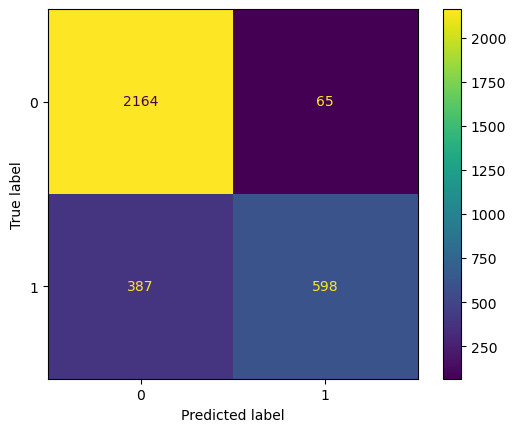

In [21]:
# Построим Confusion Matrix по модели RandomForestClassifier ко всему датасету. 

y_actual = list(data['is_ultra'])
y_predicted = model_2.predict(data.drop(['is_ultra'], axis=1))

c_matrix = confusion_matrix(y_actual, y_predicted)
cm_display = ConfusionMatrixDisplay(c_matrix).plot()

<div class="alert alert-info"><b>Комментарий:</b>

По итогам применения матрицы ошибок наблюдаем следующее:
- 2164 предсказания были истинно негативными,
- 598 предсказаний были истинно позитивными,
- 65 предсказаний были ошибочно позитивными,
- 387 предсказаний были ошибочно негативными.

Модель показывает ошибки при предсказании негативных признаков.
    
</div>

***

 <div class="alert alert-info"><b><h3>Общий вывод по исследованию:</h3></b>

* В целях решения поставленных задач исходные данные были разделены на 3 выборки: обучающую, валидационную и тестовую.      
Были исследованы три модели ML: DecisionTreeClassifier, RandomForestClassifier, LogisticRegression.
   
* По итогам сравнения качества разных моделей с учетом их гиперпараметров максимальное значение Accuracy на валидационной выборке было получено у модели RandomForestClassifier - 0.8242612752721618 (с количеством деревьев: 30 и при максимальной глубине дерева: 8).
    
* В результате применения указанной модели к тестовой выборке было получено значение Accuracy 0.8009331259720062, что удовлетворяет условию задачи (не менее 0.75).  
    
* При проверке на вменяемость модель DummyClassifier показала значение Accuracy на валидационной выборке - 0.6920684292379471, на тестовой - 0.6951788491446346. Значение Accuracy модели DummyClassifier ниже, чем значение Accuracy модели RandomForestClassifier. Таким образом, модель RandomForestClassifier вменяема. Вместе с этим, при построении Confusion Matrix было выявлено, что модель RandomForestClassifier в основном ошибается при предсказании негативных признаков.

</div>